In [25]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [1]:
lines = open('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/KeepUp Challenge/amazon-meta.txt').read().split("id:")

In [4]:
df = pd.DataFrame(lines)

In [5]:
df.head()

,0
0,# Full information about Amazon Share the Love...
1,"A User's Guide to Digital Arts, Media, and Cu..."
2,How to Avoid Technology Disasters in Business...
3,Amores I\n group: Book\n salesrank: 917901\...
4,The Captivating Chauffeur\n group: Book\n s...


In [6]:
# breakdown the list in to a dictionary by segmenting using '\n'

In [30]:
#Read file into a list
fname = "/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/KeepUp Challenge/amazon-meta.txt"
with open(fname, encoding = 'utf8') as f:
    content = f.readlines()
#trim the spaces out
content = [x.strip() for x in content] 
 
#Write to a new txt file using , as delimiter
#Write the content into file only when all information are available. Hence,
#If the data isn't complete it won't be written

file = open("testfile.txt","w", encoding='utf8')
columns = ['Id','ASIN', 'title', 'group','salesrank', 'categories', 'totalreviews', 'avgrating']
for line in content:
    lines = line.split(':')
    if lines[0] == "Id":
        if (len(columns) == 8):
            for component in columns[0:7]:
                file.write(component)
                file.write(',')
            file.write(columns[7])
            file.write("\n")
        columns = []
        columns.append(lines[1].strip())
         
    if lines[0] == "ASIN":
        columns.append(lines[1].strip())
        
    if lines[0] == "title":
        title = ':'.join(lines[1:]).strip().replace(',', ' ').replace('\n', ' ').strip()
        columns.append(title)
        
    if lines[0] == "group":
        columns.append(lines[1].strip())
        
    if lines[0] == "salesrank":
        columns.append(lines[1].strip()) 
        
    if lines[0] == "categories":
        columns.append(lines[1].strip())
     
    if lines[0] == "reviews" and lines[1].strip() == "total":
        columns.append(lines[2].split(' ')[1])
        columns.append(lines[4].strip())
file.close()

In [31]:
dfTest = pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/KeepUp Challenge/testfile.txt',sep=',')

In [32]:
dfTest.head()

,Id,ASIN,title,group,salesrank,categories,totalreviews,avgrating
0,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585,2,2,5.0
1,2,0738700797,Candlemas: Feast of Flames,Book,168596,2,12,4.5
2,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,5.0
3,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289,5,1,4.0
4,5,1577943082,Prayers That Avail Much for Business: Executive,Book,455160,2,0,0.0


In [33]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542683 entries, 0 to 542682
Data columns (total 8 columns):
Id              542683 non-null int64
ASIN            542683 non-null object
title           542683 non-null object
group           542683 non-null object
salesrank       542683 non-null int64
categories      542683 non-null int64
totalreviews    542683 non-null int64
avgrating       542683 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 33.1+ MB


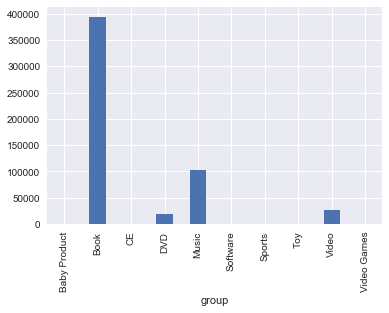

In [34]:
dfTest.groupby(['group'])['Id'].count().plot.bar()